## Optimizer (SGD vs Adam) : 5-layers DNN for Fashion MNIST (PyTorch)

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

import random
import numpy as np
import matplotlib.pyplot as plt

## Step 0. Device Stepup

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
random.seed(111)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

print("Device : ", device)

Device :  cuda


Hyperparameters

In [ ]:
lr = 1e-3
lr_adam = 1e-3
batch_size = 100
epochs = 20

### Step 1. Data -  target class : 10

In [ ]:
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(train_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

In [ ]:
print('train_data :', train_data)
print('test_data :', test_data)

train_data : Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()
test_data : Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


### Step 2. DNN Model (input = 784, hidden 1,2,3,4 = 512, output = 10 with softmax function)

In [ ]:
inputs = 28*28
units = 512

model = nn.Sequential(
    nn.Linear(inputs, units), nn.ReLU(),
    nn.Linear(units, units), nn.ReLU(),
    nn.Linear(units, units), nn.ReLU(),
    nn.Linear(units, units), nn.ReLU(),
    nn.Linear(units, 10)
    ).to(device)

model_adam = nn.Sequential(
    nn.Linear(inputs, units), nn.ReLU(),
    nn.Linear(units, units), nn.ReLU(),
    nn.Linear(units, units), nn.ReLU(),
    nn.Linear(units, units), nn.ReLU(),
    nn.Linear(units, 10)
    ).to(device)

### Step 3. Loss and Optimizer

### Optimizer : SGD with momentum=0.9 vs Adam

In [ ]:
# Initialize the loss function
loss_fn = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=0.9)
optimizer_adam = torch.optim.Adam(model_adam.parameters(), lr=lr_adam)

### Step 4. & 5. Train/Test the model

In [ ]:
def train_loop(dataloader, model, loss_fn, optimizer):
    model.train()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    
    train_loss, correct = 0, 0
    for batch, (X, y) in enumerate(dataloader):
        # reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        X = X.view(-1, inputs).to(device)
        y = y.to(device)

        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)
        train_loss += loss.item()
        correct += (pred.argmax(1) == y).type(torch.float).sum().item()

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    train_loss /= num_batches
    correct /= size
    print(f"Train - Avg loss: {train_loss:>8f},  Accuracy: {(100*correct):>0.1f}%", end = "  ")

    return train_loss, correct

In [ ]:
def test_loop(dataloader, model, loss_fn):
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            X = X.view(-1, inputs).to(device)
            y = y.to(device)

            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test - Avg loss: {test_loss:>8f}  Accuracy: {(100*correct):>0.1f}%")

    return test_loss, correct

In [ ]:
train_loss = []
train_acc = []
test_loss = []
test_acc = []
adam_train_loss = []
adam_train_acc = []
adam_test_loss = []
adam_test_acc = []
for t in range(epochs):
    print(f"Epoch {t+1} :")
    print('SGD ', end="  ")
    loss, acc = train_loop(train_dataloader, model, loss_fn, optimizer)
    train_loss.append(loss)
    train_acc.append(acc)

    loss_t, acc_t = test_loop(test_dataloader, model, loss_fn)
    test_loss.append(loss_t)
    test_acc.append(acc_t)

    print('Adam', end="  ")
    loss, acc = train_loop(train_dataloader, model_adam, loss_fn, optimizer_adam)
    adam_train_loss.append(loss)
    adam_train_acc.append(acc)

    loss_t, acc_t = test_loop(test_dataloader, model_adam, loss_fn)
    adam_test_loss.append(loss_t)
    adam_test_acc.append(acc_t)

print("Done!")

Epoch 1 :
SGD   Train - Avg loss: 2.269257,  Accuracy: 22.8%  Test - Avg loss: 2.172568  Accuracy: 26.2%
Adam  Train - Avg loss: 0.542332,  Accuracy: 80.2%  Test - Avg loss: 0.440678  Accuracy: 83.6%
Epoch 2 :
SGD   Train - Avg loss: 1.551439,  Accuracy: 43.3%  Test - Avg loss: 1.060081  Accuracy: 59.0%
Adam  Train - Avg loss: 0.378002,  Accuracy: 86.1%  Test - Avg loss: 0.380663  Accuracy: 86.4%
Epoch 3 :
SGD   Train - Avg loss: 0.906635,  Accuracy: 65.0%  Test - Avg loss: 0.834784  Accuracy: 69.8%
Adam  Train - Avg loss: 0.336027,  Accuracy: 87.6%  Test - Avg loss: 0.365388  Accuracy: 86.7%
Epoch 4 :
SGD   Train - Avg loss: 0.774603,  Accuracy: 71.8%  Test - Avg loss: 0.745712  Accuracy: 74.5%
Adam  Train - Avg loss: 0.310863,  Accuracy: 88.5%  Test - Avg loss: 0.383898  Accuracy: 86.5%
Epoch 5 :
SGD   Train - Avg loss: 0.685481,  Accuracy: 75.5%  Test - Avg loss: 0.672172  Accuracy: 76.3%
Adam  Train - Avg loss: 0.290052,  Accuracy: 89.3%  Test - Avg loss: 0.359825  Accuracy: 87.0%


### Plot the Training/Test Loss

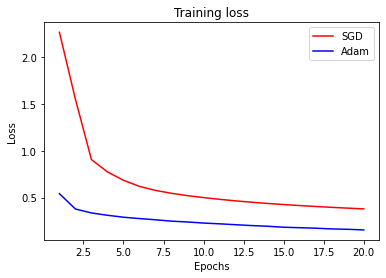

In [ ]:
epochs = np.arange(1, epochs+1)
plt.plot(epochs, train_loss, 'r', label='SGD')
plt.plot(epochs, adam_train_loss, 'b', label='Adam')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

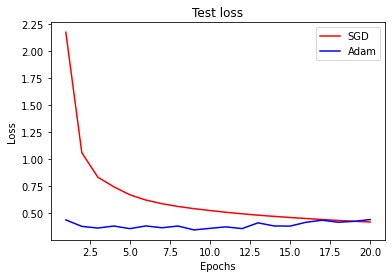

In [ ]:
plt.clf()   # 그래프를 초기화합니다
plt.plot(epochs, test_loss, 'r', label='SGD')
plt.plot(epochs, adam_test_loss, 'b', label='Adam')
plt.title('Test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Plot the Training/Test Accuracy

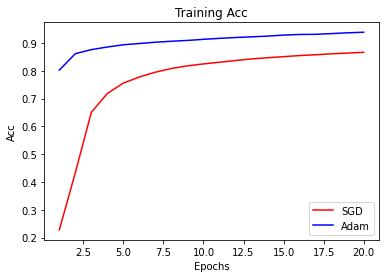

In [ ]:
plt.clf()   # 그래프를 초기화합니다
plt.plot(epochs, train_acc, 'r', label='SGD')
plt.plot(epochs, adam_train_acc, 'b', label='Adam')
plt.title('Training Acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

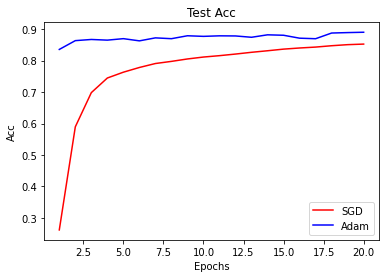

In [ ]:
plt.clf()   # 그래프를 초기화합니다
plt.plot(epochs, test_acc, 'r', label='SGD')
plt.plot(epochs, adam_test_acc, 'b', label='Adam')
plt.title('Test Acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()